In [1]:
from keras.datasets import imdb
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

Using TensorFlow backend.
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/shahir/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [5]:

from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5950 - accuracy: 0.6941 - val_loss: 0.3809 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3113 - accuracy: 0.8995 - val_loss: 0.3001 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2177 - accuracy: 0.9316 - val_loss: 0.2846 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1643 - accuracy: 0.9492 - val_loss: 0.2799 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1360 - accuracy: 0.9604 - val_loss: 0.2943 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1068 - accuracy: 0.9691 - val_loss: 0.2968 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0868 - accuracy: 0.9752 - val_loss: 0.3523 - val_accuracy: 0.8769
Epoch 8/20
30

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

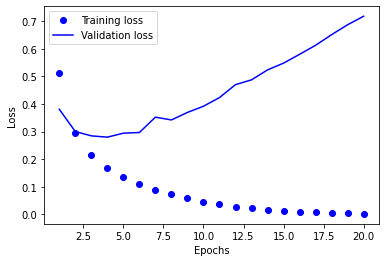

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

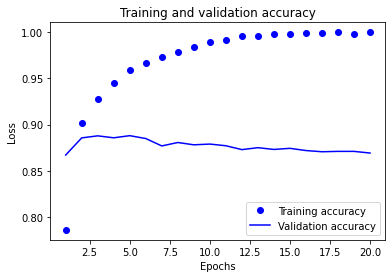

In [11]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#with epoch 4
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.6150 - accuracy: 0.6932 - val_loss: 0.4175 - val_accuracy: 0.8582
Epoch 2/4
30/30 [==============================] - 0s 11ms/step - loss: 0.3467 - accuracy: 0.9027 - val_loss: 0.3163 - val_accuracy: 0.8844
Epoch 3/4
30/30 [==============================] - 0s 11ms/step - loss: 0.2445 - accuracy: 0.9263 - val_loss: 0.2839 - val_accuracy: 0.8902
Epoch 4/4
30/30 [==============================] - 0s 10ms/step - loss: 0.1847 - accuracy: 0.9463 - val_loss: 0.2732 - val_accuracy: 0.8907


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

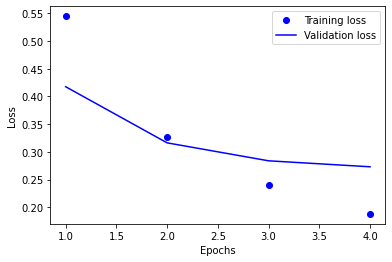

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 5)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

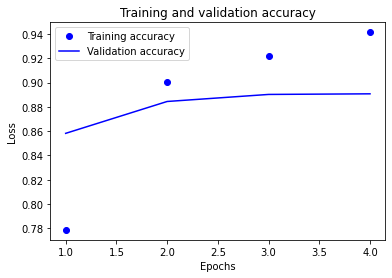

In [15]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 839us/step - loss: 0.2906 - accuracy: 0.8844


In [17]:
results

[0.29056045413017273, 0.8844000101089478]

In [18]:
#with three hidden layer
#model creation
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#model compilation
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#model fit
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6129 - accuracy: 0.6777 - val_loss: 0.3968 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3321 - accuracy: 0.8963 - val_loss: 0.3414 - val_accuracy: 0.8576
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2305 - accuracy: 0.9267 - val_loss: 0.2805 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1649 - accuracy: 0.9486 - val_loss: 0.2767 - val_accuracy: 0.8935
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1363 - accuracy: 0.9577 - val_loss: 0.2878 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1032 - accuracy: 0.9694 - val_loss: 0.3170 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0861 - accuracy: 0.9771 - val_loss: 0.3264 - val_accuracy: 0.8836
Epoch 8/20
30

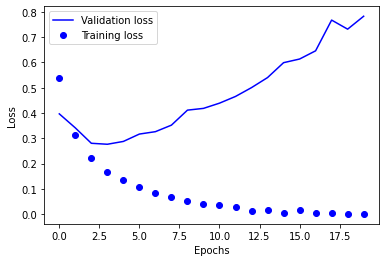

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
train_loss = history_dict['loss']
epochs = range(0, 20)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

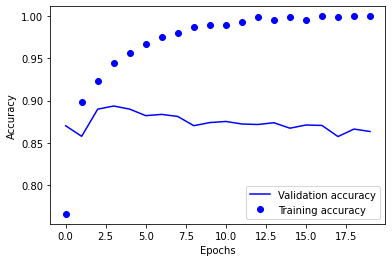

In [20]:
plt.clf()
val_acc = history_dict['val_accuracy']
acc = history_dict['accuracy']
epochs = range(0, 20)
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 849us/step - loss: 0.8678 - accuracy: 0.8490


[0.867796778678894, 0.8490399718284607]

In [22]:

model = Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Epoch 1/5
30/30 [==============================] - 1s 30ms/step - loss: 0.5577 - accuracy: 0.7340 - val_loss: 0.3583 - val_accuracy: 0.8456
Epoch 2/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2417 - accuracy: 0.9033 - val_loss: 0.2772 - val_accuracy: 0.8862
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1799 - accuracy: 0.9260 - val_loss: 0.3693 - val_accuracy: 0.8649
Epoch 4/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1391 - accuracy: 0.9474 - val_loss: 0.3344 - val_accuracy: 0.8757
Epoch 5/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1004 - accuracy: 0.9644 - val_loss: 0.3592 - val_accuracy: 0.8669


In [23]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8511


[0.4029546082019806, 0.8511199951171875]

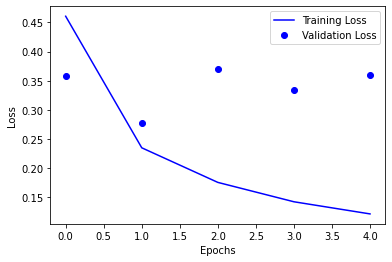

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
acc = history_dict['accuracy']
epochs = range(0, 5)
plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.4030 - accuracy: 0.8511


[0.4029546082019806, 0.8511199951171875]

In [37]:
# adding regularizer in the layers for reducing overfitting 
from keras import regularizers

model = Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                partial_y_train,
                epochs=15,
                batch_size=512,
                validation_data=(x_val, y_val))

Epoch 1/15
30/30 [==============================] - 1s 23ms/step - loss: 0.7157 - accuracy: 0.5556 - val_loss: 0.6277 - val_accuracy: 0.8154
Epoch 2/15
30/30 [==============================] - 0s 12ms/step - loss: 0.6188 - accuracy: 0.7238 - val_loss: 0.5181 - val_accuracy: 0.8374
Epoch 3/15
30/30 [==============================] - 0s 12ms/step - loss: 0.5311 - accuracy: 0.7891 - val_loss: 0.4441 - val_accuracy: 0.8685
Epoch 4/15
30/30 [==============================] - 0s 12ms/step - loss: 0.4638 - accuracy: 0.8331 - val_loss: 0.3840 - val_accuracy: 0.8825
Epoch 5/15
30/30 [==============================] - 0s 12ms/step - loss: 0.4113 - accuracy: 0.8614 - val_loss: 0.3491 - val_accuracy: 0.8839
Epoch 6/15
30/30 [==============================] - 0s 11ms/step - loss: 0.3683 - accuracy: 0.8891 - val_loss: 0.3409 - val_accuracy: 0.8848
Epoch 7/15
30/30 [==============================] - 0s 12ms/step - loss: 0.3394 - accuracy: 0.9022 - val_loss: 0.3329 - val_accuracy: 0.8847
Epoch 8/15
30

In [38]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 914us/step - loss: 0.3963 - accuracy: 0.8764


[0.396330863237381, 0.8763999938964844]

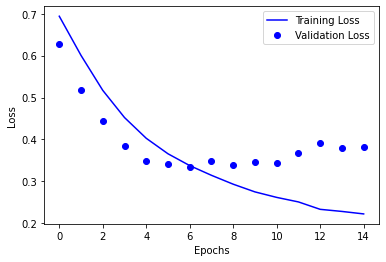

In [40]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
acc = history_dict['accuracy']
epochs = range(0, 15)
plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
acc = history_dict['accuracy']
epochs = range(0, 5)
plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 932us/step - loss: 0.3448 - accuracy: 0.8820


[0.344827800989151, 0.8819599747657776]

In [ ]:
# adding dropout layer
from keras import regularizers
model = Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                partial_y_train,
                epochs=5,
                batch_size=512,
                validation_data=(x_val, y_val))